# Самостоятельный проект по спринту "Принятие решений в бизнесе"


Цель проекта - проанализировать список гипотез, чтобы увеличить выручку компании.


**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


Описание данных
Данные для первой части проекта

Файл `/datasets/hypothesis.csv`.

    `Hypothesis` — краткое описание гипотезы;
    `Reach — охват` пользователей по 10-балльной шкале;
    `Impact` — влияние на пользователей по 10-балльной шкале;
    `Confidence` — уверенность в гипотезе по 10-балльной шкале;
    `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части проекта

Файл `datasets/orders.csv`.

    `transactionId` — идентификатор заказа;
    `visitorId` — идентификатор пользователя, совершившего заказ;
    `date` — дата, когда был совершён заказ;
    `revenue` — выручка заказа;
    `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`.

    `date` — дата;
    `group` — группа A/B-теста;
    `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста



# Часть 1. Приоритизация гипотез


Задачи в первой части:


- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [3]:
# все числа типа float отображаются в формате .хх (два знака после запятой)
pd.options.display.float_format = '{:.2f}'.format 

In [4]:
data = pd.read_csv('/datasets/hypothesis.csv') # чтение файла с данными и сохранение в data

In [5]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
data.style.set_properties(**{'text-align': 'left'}) 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
# столбцы переименовывать не надо, просто приведем названия к нижнему регистру
data.columns = data.columns.str.lower()

In [8]:
data.info() # получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Всё ок. 

Переходим к заданию - применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [10]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts'] # формула для расчёта по методу ICE

In [11]:
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False) # выводим на экран отсортированный результат

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Самые приоритетные гипотезы по фреймворку ICE: 8, 0 и 7.

Переходим к расчёту по методу RICE.

In [12]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts'] # формула для расчёта по методу RICE

In [13]:
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False) # выводим на экран отсортированный результат

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,56.00
0,"Добавить два новых канала привлечения трафика,...",40.00
6,Показать на главной странице баннеры с актуаль...,40.00
8,"Запустить акцию, дающую скидку на товар в день...",16.20
3,"Изменить структура категорий, что увеличит кон...",9.00
1,"Запустить собственную службу доставки, что сок...",4.00
5,"Добавить страницу отзывов клиентов о магазине,...",4.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3.00


Если сравнивать с методом ICE, то изменения следующие: на первом месте теперь гипотеза № 7 (была на 3м) - это произошло из-за того, что "reach" у этой гипотезы максимальный - 10 баллов. На втором и третьем месте теперь гипотезы №2 и №0.

Вывод по первой части проекта: если выбирать самые приоритетные гипотезы, то это будут: №7 и №0. С ними нужно работать дальше.

# Часть 2. Анализ A/B-теста

Задачи второй части проекта:

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [14]:
orders = pd.read_csv('/datasets/orders.csv') # чтение файла с данными и сохранение в orders

In [15]:
orders.head(5) # вывод первых 5 строк

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [16]:
orders.info() # получение общей информации о данных в таблице orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [17]:
orders['group'].unique() # проверка на то, что в столбце 'group' содержатся только группы A и B.

array(['B', 'A'], dtype=object)

In [18]:
# приведение названий столбцов к snake_case
orders = orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'}) 

In [19]:
orders['date'] = pd.to_datetime(orders['date']) # изменим тип данных с object на date

In [20]:
visitors = pd.read_csv('/datasets/visitors.csv')  # чтение файла с данными и сохранение в visitors

In [21]:
visitors.head(5) # вывод первых 5 строк

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
visitors.info() # получение общей информации о данных в таблице visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [23]:
visitors['date'] = pd.to_datetime(visitors['date'])  # изменим тип данных с object на date

In [24]:
visitors['group'].unique() # проверка на то, что в столбце 'group' содержатся только группы A и B.

array(['A', 'B'], dtype=object)

In [25]:
orders.pivot_table(index='visitor_id', values='group', aggfunc='nunique').query('group > 1').count()

group    58
dtype: int64

После проверки обнаружилось 58 дубликатов. Получается, что всего 1139 уникальных пользователей.

Так как таких пользователей менее 5%, то это не повлияет на окончательный результат, поэтому оставляем как есть.

Вывод: таблицы готовы к проведению АБ-теста - данные приведены к необходимым типам, название столбцов изменены, где это необходимо.

1. Постройте график кумулятивной выручки по группам. 

In [26]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transaction_id' : pd.Series.nunique,
        'visitor_id' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

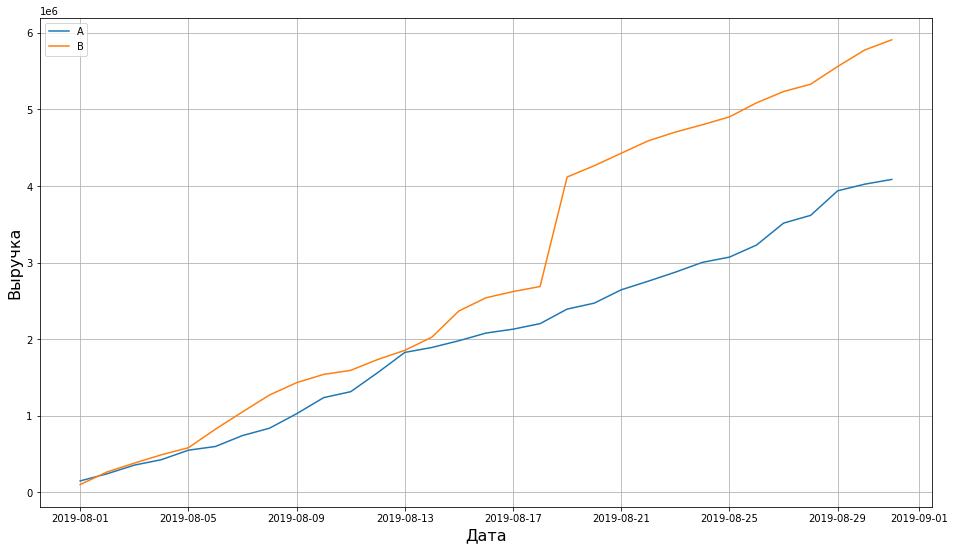

In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата', fontsize=16)
plt.ylabel('Выручка', fontsize=16)

plt.grid()
plt.legend();

Вывод: в середине теста сегмент В вырвался вперёд и продожал лидировать весь остаток теста. Необхоидмо понять с чем это связано: с резким увеличением количества заказов или с ростом стоимости.

2. Постройте график кумулятивного среднего чека по группам.

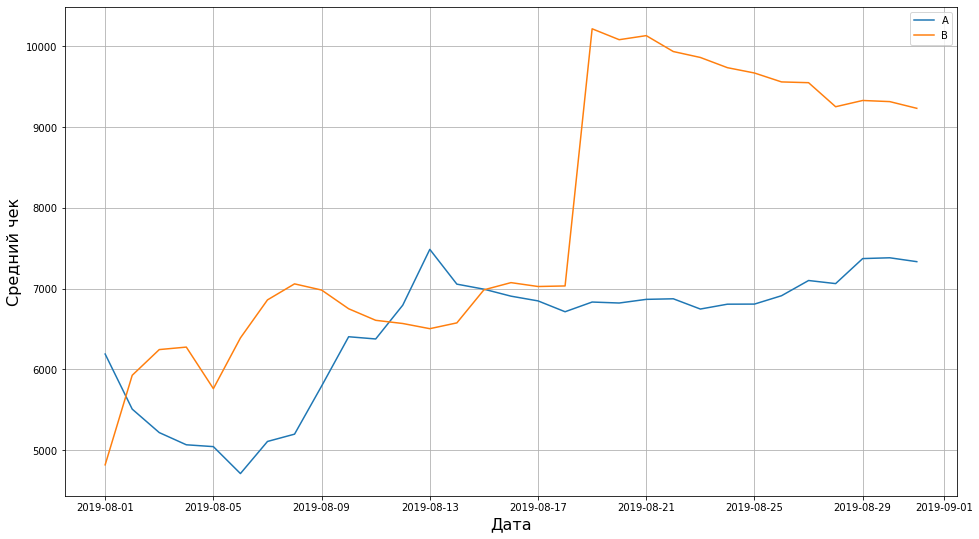

In [28]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Средний чек', fontsize=16)

plt.grid()
plt.legend();


Вывод: кумулятивное значение среднего чека в группе В значительно выше, чем в группе А. Необходимо проверить как изменится результат после удаления крупных заказов.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.

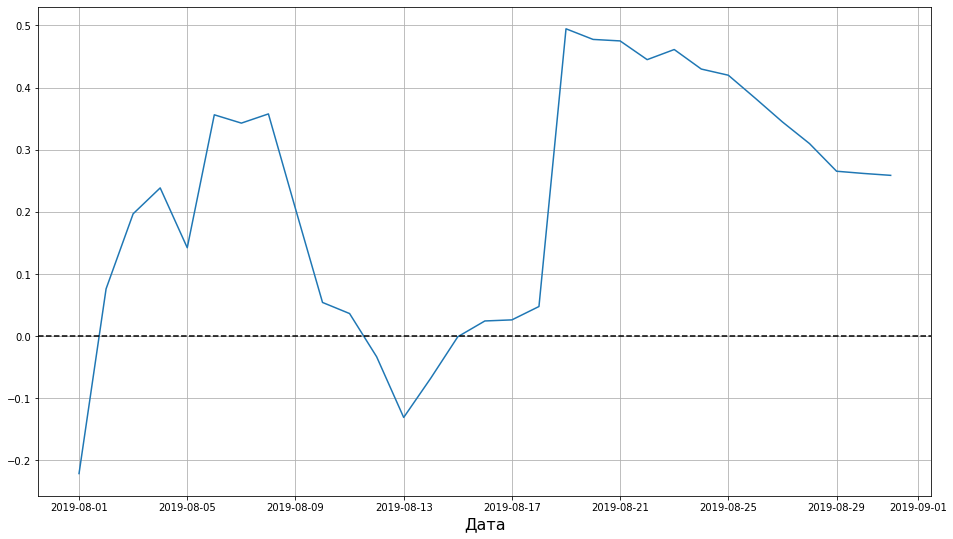

In [29]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата', fontsize=16)

plt.grid();

Вывод: в нескольких точках график различия между сегментами резко «скачет». И график не стремится к нулю, значит - в группе В точно есть очень крупные заказы и выбросы.

4. Постройте график кумулятивной конверсии по группам.

Для начала найдем даты начала и конца проведения теста.

In [30]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [31]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [32]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [33]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

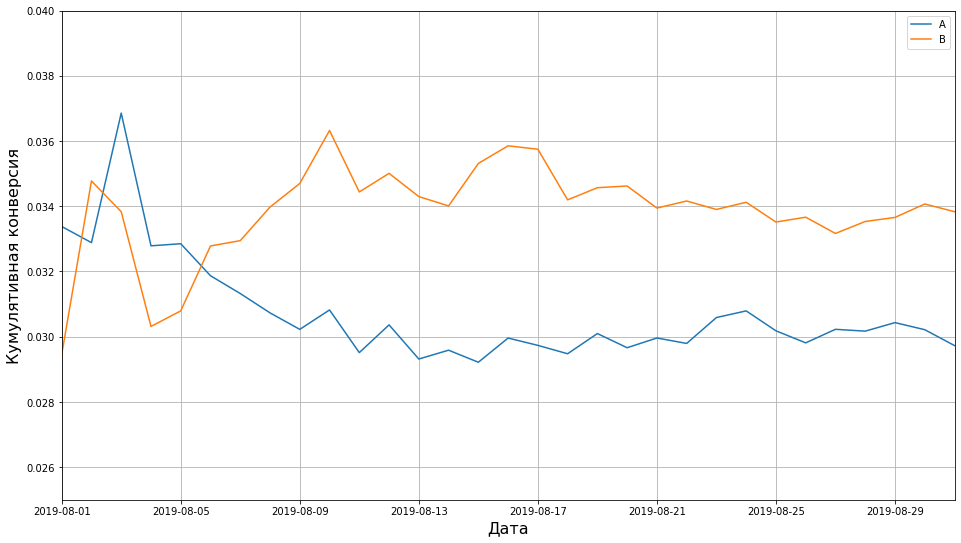

In [34]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.025, 0.04])
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Кумулятивная конверсия', fontsize=16)

plt.grid();

Вывод: вначале были всплески и сегмент А имел большую конверсию, но затем сегмент B начал резко расти, выровнялся и зафиксировался вокруг одного значения (0.034), больше значение сегмента А (0.03).

5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A.

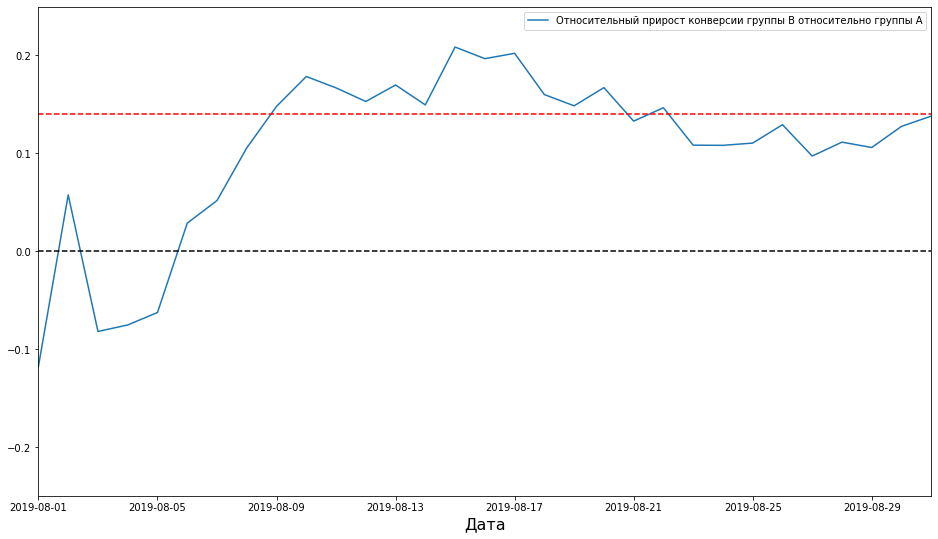

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='red', linestyle='--')
plt.xlabel('Дата', fontsize=16)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.25, 0.25]);

Вывод: в начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия незначительно падала, но теперь постепенно растёт.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

6. Постройте точечный график количества заказов по пользователям. 

In [36]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


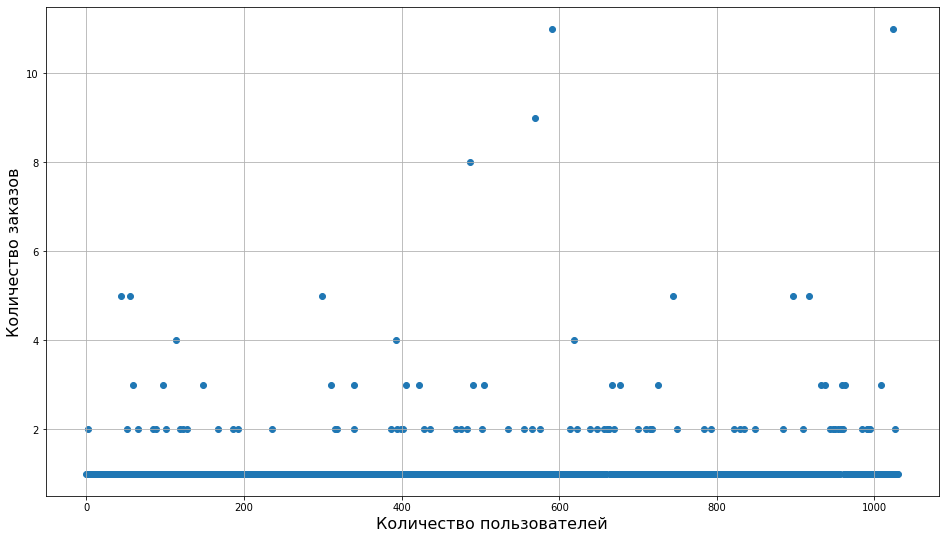

In [37]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Количество пользователей', fontsize=16)
plt.ylabel('Количество заказов', fontsize=16)

plt.grid();

Вывод: пользователей, заказавших более двух раз, совсем мало. Они могут быть аномальными. Чтобы это понять, надо посчитать выборочные перцентили. 

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [38]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Вывод: не более 5% пользователей совершили более двух заказов и не более 1% - более 4 заказов. 2 заказа будет границей для определения аномальных пользователей.

8. Постройте точечный график стоимостей заказов. 

In [39]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


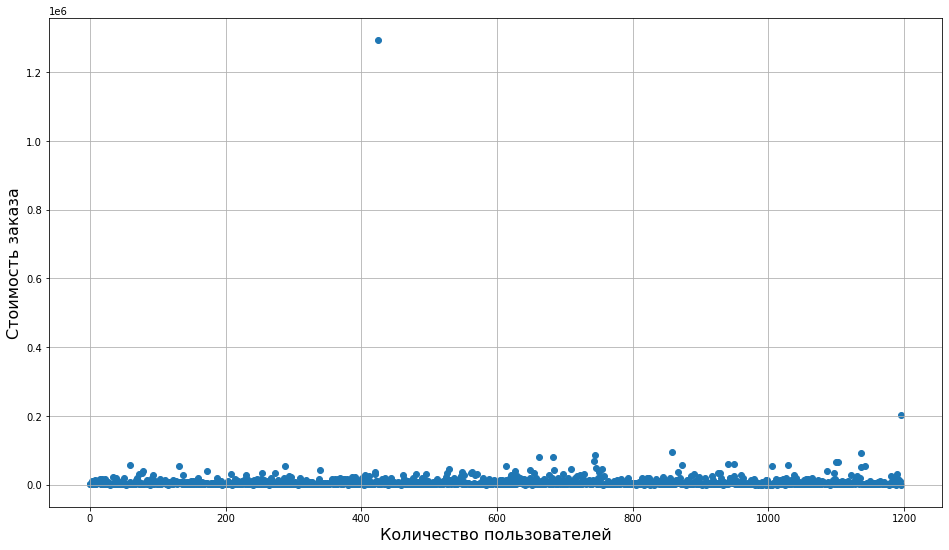

In [40]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей', fontsize=16)
plt.ylabel('Стоимость заказа', fontsize=16)

plt.grid();

Удалим 2 выброса и рассмотрим основную часть заказов.

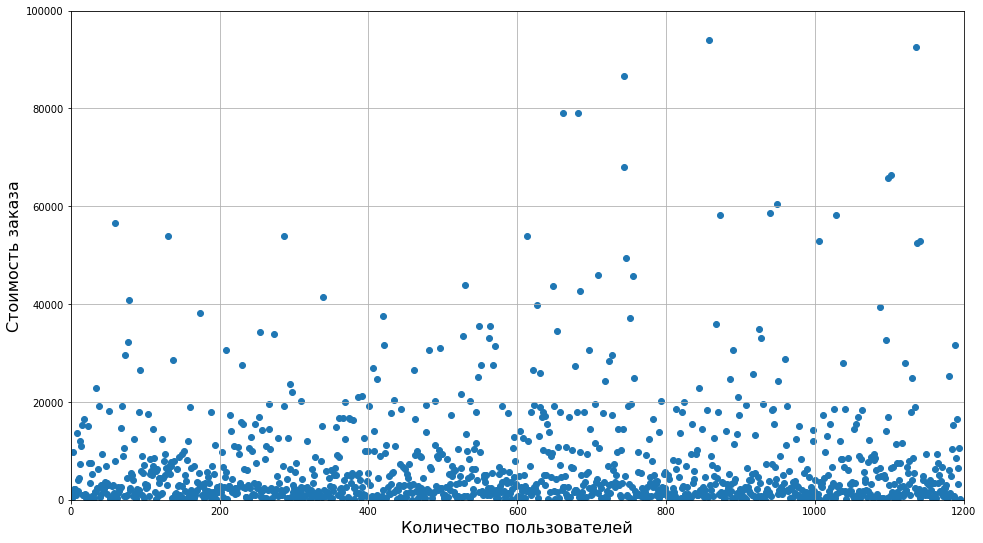

In [41]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей', fontsize=16)
plt.ylabel('Стоимость заказа', fontsize=16)

plt.grid()
plt.axis([0, 1200, 0, 100000]);

Вывод: заказов стоимость более 100 тысяч рублей практически нет. Есть 2 выброса в районе 200 тыс. и 1,3 млн. руб. Найдем выборочные перцентили.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [42]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Выыод: не более, чем у 5% заказов чек дороже 28 тыс. руб. И не больше, чем у 1% заказов дороже 58 тыс. руб. Сумма 28 тыс. руб. будет границей для определения аномальных пользователей. 

10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

 **Метод, которым будем рассчитывать статистическую значимость, называется st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»). Вероятности получения разных значений критерия Манна-Уитни рассчитаны теоретически, что даёт возможность делать вывод о различии или его отсутствии для любого заданного уровня значимости.
Критерий Манна — Уитни является непараметрическим методом. Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты. Также это метод позволяет выявлять различия в значении параметра между малыми выборками.**

In [43]:
alpha = 0.05

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']



ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')    
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



results = stats.mannwhitneyu(sampleA, sampleB)[1]

print('p-значение: ', results)

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима
0.138


Относительный прирост среднего группы В к конверсии группы А равен 13.8%.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [44]:
results=stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-значение: ', results)

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
0.259


~~Относительное различие среднего чека между сегментами почти 26% - группа В по-прежнему выигрывает. ~~

Cредний чек группы B значительно выше среднего чека группы A - почти на 26%.

# Очистка данных

В качестве границ для определения аномалий возьмем значения, полученные в п. 7 и 9.

In [45]:
typical_revenue = 28000
typical_order_qty = 2

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > typical_order_qty]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > typical_order_qty]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > typical_revenue]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64

Теперь выясним есть ли существенные различия между группами с очищенными данными. 

12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. 

In [47]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > typical_order_qty]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > typical_order_qty]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > typical_revenue]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
results=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-значение: ', results)

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.013042592743036745
Отвергаем нулевую гипотезу: разница статистически значима


Как и в случае с "сырыми данными", статистическая значимость достигнута. Группа В значительно лучше группы А.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [48]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > typical_order_qty]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > typical_order_qty]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > typical_revenue]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

print('p-значение: ', results)

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение:  0.738481751314565
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
-0.020


Теперь средний чек группы B незначительно ниже среднего чека группы A - всего на 2%.

14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

- По сырым данным нет статистически значимого различия по среднему чеку между группами, такая же ситуация с данными после очистки.  



**Группа В значимо лучше группы А по параметру "Конверсия" - фиксируем победу группы В (только по этому параметру).**